In [93]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [94]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.keras'

# 分類数設定

In [95]:
NUM_CLASSES = 3

# 入力長

In [96]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [97]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [98]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [100]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

C:\Users\JellyFish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [101]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 24)                  │             792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,075 (4.20 KB)

 Trainable params: 1,075 (4.20 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [103]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [104]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.2188 - loss: 1.2891
Epoch 1: saving model to model/point_history_classifier/point_history_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2322 - loss: 1.2835 - val_accuracy: 0.2165 - val_loss: 1.1633
Epoch 2/1000
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2344 - loss: 1.2478
Epoch 2: saving model to model/point_history_classifier/point_history_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2570 - loss: 1.2138 - val_accuracy: 0.2062 - val_loss: 1.1380
Epoch 3/1000
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2812 - loss: 1.1653
Epoch 3: saving model to model/point_history_classifier/point_history_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2729 - loss: 1.1733 - val_accuracy: 0.2062 - val_loss: 1.1182
Epoch 4/1000
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2969 - loss: 1.1694
Epoch 4: saving model to model/point_history_classifier/

Epoch 183/1000
26/32 [=======================>......] - ETA: 0s - loss: 0.4351 - accuracy: 0.8459
Epoch 00183: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 10ms/step - loss: 0.4335 - accuracy: 0.8482 - val_loss: 0.1944 - val_accuracy: 0.9645
Epoch 184/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.4186 - accuracy: 0.8422
Epoch 00184: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4222 - accuracy: 0.8454 - val_loss: 0.1945 - val_accuracy: 0.9645
Epoch 185/1000
32/32 [==============================] - ETA: 0s - loss: 0.4106 - accuracy: 0.8459
Epoch 00185: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4106 - accuracy: 0.8459 - val_loss: 0.1939 - val_accuracy: 0.9660
Epoch 186/1000
25/32 [======================>.

Epoch 209/1000
26/32 [=======================>......] - ETA: 0s - loss: 0.4140 - accuracy: 0.8407
Epoch 00209: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4080 - accuracy: 0.8444 - val_loss: 0.1874 - val_accuracy: 0.9645
Epoch 210/1000
32/32 [==============================] - ETA: 0s - loss: 0.4091 - accuracy: 0.8567
Epoch 00210: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4091 - accuracy: 0.8567 - val_loss: 0.1879 - val_accuracy: 0.9683
Epoch 211/1000
28/32 [=========================>....] - ETA: 0s - loss: 0.4135 - accuracy: 0.8418
Epoch 00211: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 10ms/step - loss: 0.4142 - accuracy: 0.8429 - val_loss: 0.1873 - val_accuracy: 0.9675
Epoch 212/1000
25/32 [======================>.

Epoch 235/1000
32/32 [==============================] - ETA: 0s - loss: 0.3989 - accuracy: 0.8610
Epoch 00235: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3989 - accuracy: 0.8610 - val_loss: 0.1768 - val_accuracy: 0.9705
Epoch 236/1000
27/32 [========================>.....] - ETA: 0s - loss: 0.4107 - accuracy: 0.8539
Epoch 00236: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 10ms/step - loss: 0.4055 - accuracy: 0.8540 - val_loss: 0.1794 - val_accuracy: 0.9668
Epoch 237/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.3972 - accuracy: 0.8484
Epoch 00237: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4037 - accuracy: 0.8474 - val_loss: 0.1788 - val_accuracy: 0.9683
Epoch 238/1000
26/32 [=======================>

Epoch 261/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.3938 - accuracy: 0.8637
Epoch 00261: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4018 - accuracy: 0.8595 - val_loss: 0.1723 - val_accuracy: 0.9683
Epoch 262/1000
26/32 [=======================>......] - ETA: 0s - loss: 0.3979 - accuracy: 0.8621
Epoch 00262: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 10ms/step - loss: 0.3969 - accuracy: 0.8610 - val_loss: 0.1716 - val_accuracy: 0.9660
Epoch 263/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.3927 - accuracy: 0.8541
Epoch 00263: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3899 - accuracy: 0.8552 - val_loss: 0.1736 - val_accuracy: 0.9683
Epoch 264/1000
25/32 [======================>.

Epoch 287/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.3942 - accuracy: 0.8609
Epoch 00287: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3916 - accuracy: 0.8605 - val_loss: 0.1672 - val_accuracy: 0.9675
Epoch 288/1000
28/32 [=========================>....] - ETA: 0s - loss: 0.3862 - accuracy: 0.8577
Epoch 00288: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 10ms/step - loss: 0.3879 - accuracy: 0.8593 - val_loss: 0.1700 - val_accuracy: 0.9690
Epoch 289/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.3733 - accuracy: 0.8625
Epoch 00289: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3798 - accuracy: 0.8608 - val_loss: 0.1680 - val_accuracy: 0.9698
Epoch 290/1000
25/32 [======================>.

Epoch 313/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.3702 - accuracy: 0.8725
Epoch 00313: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3745 - accuracy: 0.8673 - val_loss: 0.1671 - val_accuracy: 0.9690
Epoch 314/1000
26/32 [=======================>......] - ETA: 0s - loss: 0.3874 - accuracy: 0.8639
Epoch 00314: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3850 - accuracy: 0.8658 - val_loss: 0.1636 - val_accuracy: 0.9705
Epoch 315/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.3865 - accuracy: 0.8628
Epoch 00315: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3923 - accuracy: 0.8603 - val_loss: 0.1645 - val_accuracy: 0.9705
Epoch 316/1000
27/32 [========================

Epoch 339/1000
32/32 [==============================] - ETA: 0s - loss: 0.3769 - accuracy: 0.8633
Epoch 00339: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3769 - accuracy: 0.8633 - val_loss: 0.1553 - val_accuracy: 0.9683
Epoch 340/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.3625 - accuracy: 0.8669
Epoch 00340: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3648 - accuracy: 0.8653 - val_loss: 0.1565 - val_accuracy: 0.9698
Epoch 341/1000
26/32 [=======================>......] - ETA: 0s - loss: 0.3605 - accuracy: 0.8669
Epoch 00341: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3588 - accuracy: 0.8688 - val_loss: 0.1580 - val_accuracy: 0.9675
Epoch 342/1000
25/32 [======================>.

In [105]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [106]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[0.01948923 0.62926584 0.35124496]
1


# 混同行列

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


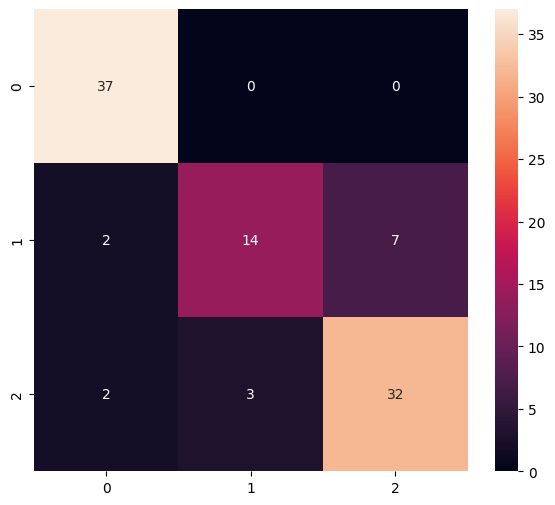

Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        37
           1       0.82      0.61      0.70        23
           2       0.82      0.86      0.84        37

    accuracy                           0.86        97
   macro avg       0.85      0.82      0.83        97
weighted avg       0.85      0.86      0.85        97



In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [108]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [109]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [110]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\JELLYF~1\AppData\Local\Temp\tmpm3qcfi5p\assets


INFO:tensorflow:Assets written to: C:\Users\JELLYF~1\AppData\Local\Temp\tmpm3qcfi5p\assets


Saved artifact at 'C:\Users\JELLYF~1\AppData\Local\Temp\tmpm3qcfi5p'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  3083682264464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3083682264272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3083584727440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3083584724944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3083584724560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3083584725520: TensorSpec(shape=(), dtype=tf.resource, name=None)


6416

# 推論テスト

In [111]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

C:\Users\JellyFish\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [112]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_layer_4:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [113]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [114]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [115]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.01948923 0.6292659  0.3512449 ]
1
